In [1]:
##Importación de datos
import pandas
import pandasql as pd
import seaborn as sns
import matplotlib.pyplot as plt
cleaned_air=pandas.read_csv('cleaned_airlines.csv')
cleaned_air[:5]

,Unnamed: 0,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Landing Aircraft Type,Aircraft Body Type,Aircraft Manufacturer,Aircraft Model,Landing Count,Total Landed Weight
0,0,SkyWest Airlines,OO,United Airlines,UA,International,Canada,Passenger,Regional Jet,Bombardier,CRJ2,30,1410000
1,1,Air Canada,AC,Air Canada,AC,International,Canada,Passenger,Narrow Body,Airbus,A320,125,17787978
2,2,Japan Airlines,JL,Japan Airlines,JL,International,Asia,Passenger,Wide Body,Boeing,B773,30,16620000
3,3,"COPA Airlines, Inc.",CM,"COPA Airlines, Inc.",CM,International,Central America,Passenger,Narrow Body,Boeing,B739,3,491700
4,4,Hong Kong Airlines Limited,HX,Hong Kong Airlines Limited,HX,International,Asia,Passenger,Wide Body,Airbus,A359,16,7301712


In [2]:
##Peso total desembarcado promedio por región
region_avg_weight=cleaned_air.groupby('GEO Region')['Total Landed Weight'].mean()
region_avg_weight=region_avg_weight.to_frame('Average Total Landed Weight')
region_avg_weight

,Average Total Landed Weight
GEO Region,
Asia,1.774287e+07
Australia / Oceania,1.026978e+07
Canada,5.607879e+06
Caribbean,5.029593e+05
Central America,3.848933e+06
Europe,1.519388e+07
Mexico,4.199444e+06
Middle East,1.331029e+07
South America,4.445480e+06


In [3]:
##Extracción de datos de la distribución de aviones por región en intervalos de percentiles por el peso total desembarcado
air_info=pandas.DataFrame()
Regions=cleaned_air['GEO Region']
##Se extrae la lista de regiones y se eliminan los datos duplicados
Regions.drop_duplicates(inplace=True)
##Debido a que al utilizar la función drop_duplicates el objeto se transforma en un tipo serie, se vuelve a convertir en dataframe
Regions.to_frame()
##indext actúa como el índice requerido para crear filas en dataframes nuevos
indext=0
for region in Regions:
    ##Se implementa una fila temporal que va a ser agregada al dataset final
    temp_row=pandas.DataFrame({'GEO Region':region},index=[indext])
    ##Por cada intervalo de percentiles se utiliza una columna temporal que va a ser agregada a la fila
    temp_column=pandas.DataFrame()
    for number in range(1,10):
        ##Se establecen los percentiles límites de los rangos
        temp_max=number*10/100
        temp_min=((number*10)-10)/100
        ##Se obtiene la cantidad de registros por región dentro del rango de percentiles establecido
        temp_lenght=len(cleaned_air[(cleaned_air['Total Landed Weight'] >= cleaned_air[(cleaned_air['GEO Region']==region)]['Total Landed Weight'].quantile(temp_min)) & (cleaned_air['Total Landed Weight'] <= cleaned_air[(cleaned_air['GEO Region']==region)]['Total Landed Weight'].quantile(temp_max)) & (cleaned_air['GEO Region']==region)])
        ##Se coloca un nombre a la columna temporal y los datos extraídos
        temp_name='P'+str(temp_min*100)+'-'+str(temp_max*100)
        temp_column=pandas.DataFrame({'GEO Region':region,temp_name:temp_lenght},index=[indext])
        ##Se agrega la columna temporal a la fila temporal
        temp_row=pandas.merge(temp_row,temp_column, on='GEO Region')
    ##Finalmente se agrega la fila temporal al dataset y se suma el índice
    air_info = pandas.concat([air_info, temp_row], ignore_index=True)
    indext=indext+1
air_info.to_csv('percentile_ranges_Region.csv')
air_info

,GEO Region,P0.0-10.0,P10.0-20.0,P20.0-30.0,P30.0-40.0,P40.0-50.0,P50.0-60.0,P60.0-70.0,P70.0-80.0,P80.0-90.0
0,Canada,205,208,204,206,204,206,205,206,207
1,Asia,409,410,410,416,420,415,518,414,422
2,Central America,36,35,33,34,44,42,37,37,34
3,Europe,234,233,233,235,237,238,320,250,243
4,US,1086,1088,1084,1084,1084,1084,1084,1084,1085
5,Mexico,158,160,192,160,161,159,159,159,158
6,Australia / Oceania,67,74,73,65,70,67,72,68,73
7,Middle East,17,16,16,16,37,23,66,43,45
8,Caribbean,1,0,0,0,1,1,0,0,0
9,South America,5,17,14,14,18,10,16,10,18


In [4]:
##Obtener estadísticas generales del peso total desembarcado por región geográfica
for Region in region_avg_weight.index:
    temp_region=cleaned_air.loc[cleaned_air['GEO Region']==Region,['GEO Region','Total Landed Weight']]
    print(Region)
    print(temp_region.describe())

Asia
       Total Landed Weight
count         4.082000e+03
mean          1.774287e+07
std           1.745269e+07
min           3.199990e+05
25%           7.756000e+06
50%           1.499600e+07
75%           1.953000e+07
max           1.171800e+08
Australia / Oceania
       Total Landed Weight
count         6.470000e+02
mean          1.026978e+07
std           6.100572e+06
min           3.800000e+05
25%           5.040000e+06
50%           1.034000e+07
75%           1.457900e+07
max           2.331000e+07
Canada
       Total Landed Weight
count         2.028000e+03
mean          5.607879e+06
std           5.320427e+06
min           4.700000e+04
25%           1.336375e+06
50%           4.023000e+06
75%           8.828500e+06
max           3.615798e+07
Caribbean
       Total Landed Weight
count             3.000000
mean         502959.333333
std          111925.211464
min          418878.000000
25%          439439.000000
50%          460000.000000
75%          545000.000000
max          

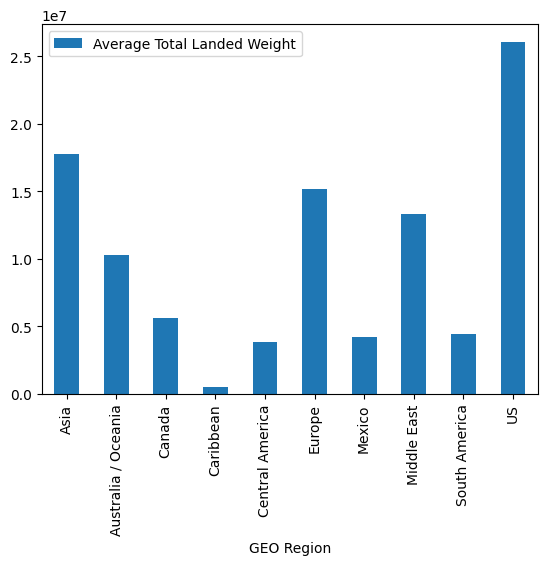

In [5]:
## Peso total desembarcado promedio por región
region_avg_weight.plot(kind='bar')
plt.show()

In [6]:
##Peso total desembarcado mínimo por región
region_min_weight=cleaned_air.groupby('GEO Region')['Total Landed Weight'].min()
region_min_weight=region_min_weight.to_frame('Min Total Landed Weight')
region_min_weight

,Min Total Landed Weight
GEO Region,
Asia,319999
Australia / Oceania,380000
Canada,47000
Caribbean,418878
Central America,137500
Europe,90389
Mexico,28000
Middle East,380000
South America,363000


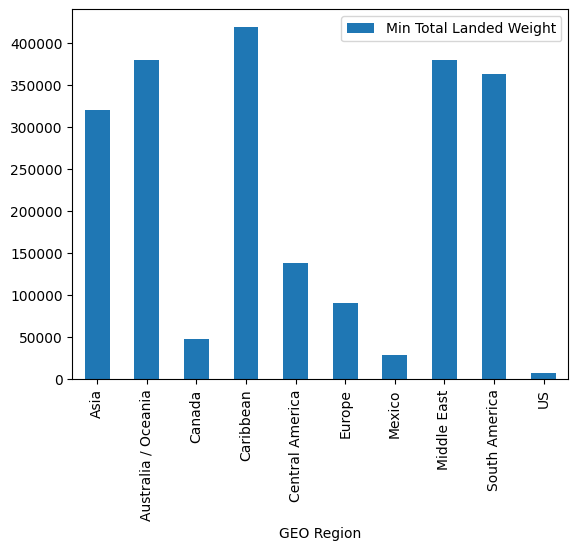

In [7]:
region_min_weight.plot(kind='bar')
plt.show()

In [8]:
##Percentil 25 del peso total desembarcado por región
region_p25_weight=cleaned_air.groupby('GEO Region')['Total Landed Weight'].quantile(0.25)
region_p25_weight=region_p25_weight.to_frame('P25 Total Landed Weight')
region_p25_weight

,P25 Total Landed Weight
GEO Region,
Asia,7756000.0
Australia / Oceania,5040000.0
Canada,1336375.0
Caribbean,439439.0
Central America,1100000.0
Europe,6400000.0
Mexico,1152000.0
Middle East,7980000.0
South America,4160000.0


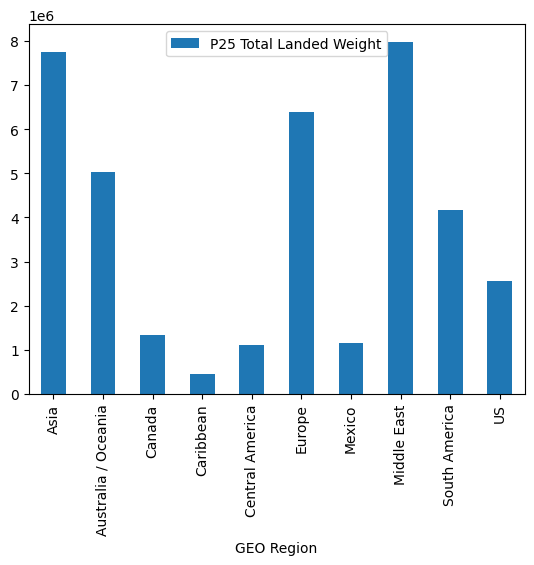

In [9]:
region_p25_weight.plot(kind='bar')
plt.show()

In [10]:
##Percentil 50 del peso total desembarcado por región
region_p50_weight=cleaned_air.groupby('GEO Region')['Total Landed Weight'].quantile(0.50)
region_p50_weight=region_p50_weight.to_frame('P50 Total Landed Weight')
region_p50_weight

,P50 Total Landed Weight
GEO Region,
Asia,14996000.0
Australia / Oceania,10340000.0
Canada,4023000.0
Caribbean,460000.0
Central America,4266000.0
Europe,13803000.0
Mexico,3657500.0
Middle East,16619970.0
South America,4480000.0


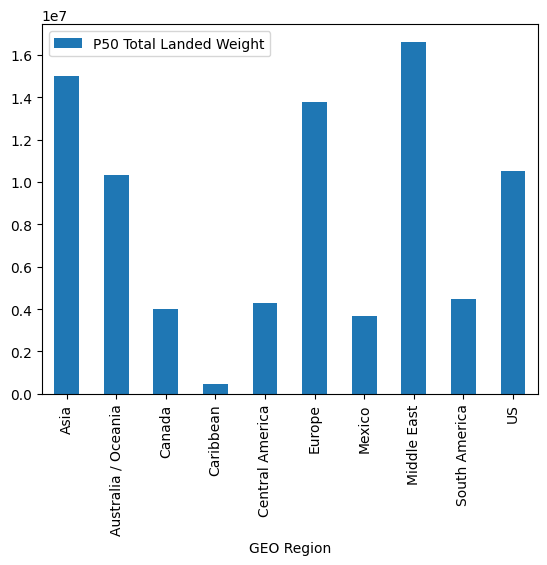

In [11]:
region_p50_weight.plot(kind='bar')
plt.show()

In [12]:
##Percentil 75 del peso total desembarcado por región
region_p75_weight=cleaned_air.groupby('GEO Region')['Total Landed Weight'].quantile(0.75)
region_p75_weight=region_p75_weight.to_frame('P75 Total Landed Weight')
region_p75_weight

,P75 Total Landed Weight
GEO Region,
Asia,19530000.0
Australia / Oceania,14579000.0
Canada,8828500.0
Caribbean,545000.0
Central America,5545800.0
Europe,19530000.0
Mexico,5853267.0
Middle East,17173969.0
South America,5440000.0


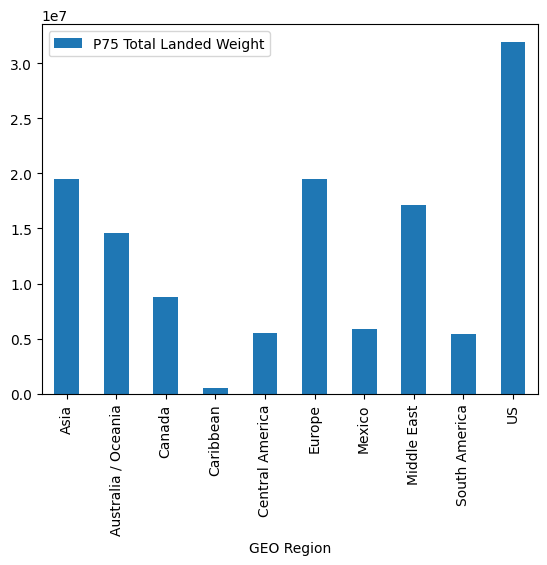

In [13]:
region_p75_weight.plot(kind='bar')
plt.show()

In [14]:
##Percentil max del peso total desembarcado por región
region_max_weight=cleaned_air.groupby('GEO Region')['Total Landed Weight'].max()
region_max_weight=region_max_weight.to_frame('Max Total Landed Weight')
region_max_weight

,Max Total Landed Weight
GEO Region,
Asia,117180000
Australia / Oceania,23310000
Canada,36157976
Caribbean,630000
Central America,11704000
Europe,75600000
Mexico,19363600
Middle East,26927251
South America,5760000


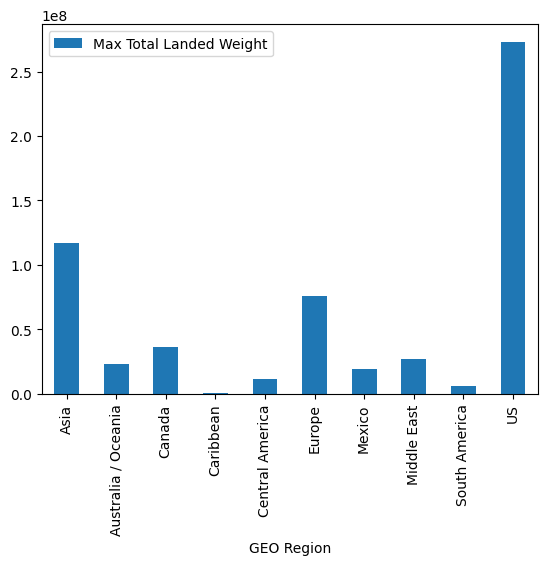

In [15]:
region_max_weight.plot(kind='bar')
plt.show()

In [16]:
##Preparar todas las estadísticas
all_stats=pd.sqldf('SELECT  mn."GEO Region",mn."Min Total Landed Weight", p25."P25 Total Landed Weight", p50."P50 Total Landed Weight", p75."P75 Total Landed Weight", mx."Max Total Landed Weight" FROM  region_min_weight mn INNER JOIN  region_p25_weight p25 ON mn."GEO Region"=p25."GEO Region"     INNER JOIN  region_p50_weight p50 ON mn."GEO Region"=p50."GEO Region" INNER JOIN  region_p75_weight p75 ON mn."GEO Region"=p75."GEO Region" INNER JOIN  region_max_weight mx ON mn."GEO Region"=mx."GEO Region"',globals())
all_stats.set_index('GEO Region',inplace=True)
all_stats.to_csv('Geo_Region_stats.csv')

In [24]:
all_stats

,Min Total Landed Weight,P25 Total Landed Weight,P50 Total Landed Weight,P75 Total Landed Weight,Max Total Landed Weight
GEO Region,,,,,
Asia,319999,7756000.0,14996000.0,19530000.0,117180000
Australia / Oceania,380000,5040000.0,10340000.0,14579000.0,23310000
Canada,47000,1336375.0,4023000.0,8828500.0,36157976
Caribbean,418878,439439.0,460000.0,545000.0,630000
Central America,137500,1100000.0,4266000.0,5545800.0,11704000
Europe,90389,6400000.0,13803000.0,19530000.0,75600000
Mexico,28000,1152000.0,3657500.0,5853267.0,19363600
Middle East,380000,7980000.0,16619970.0,17173969.0,26927251
South America,363000,4160000.0,4480000.0,5440000.0,5760000


<Axes: ylabel='GEO Region'>

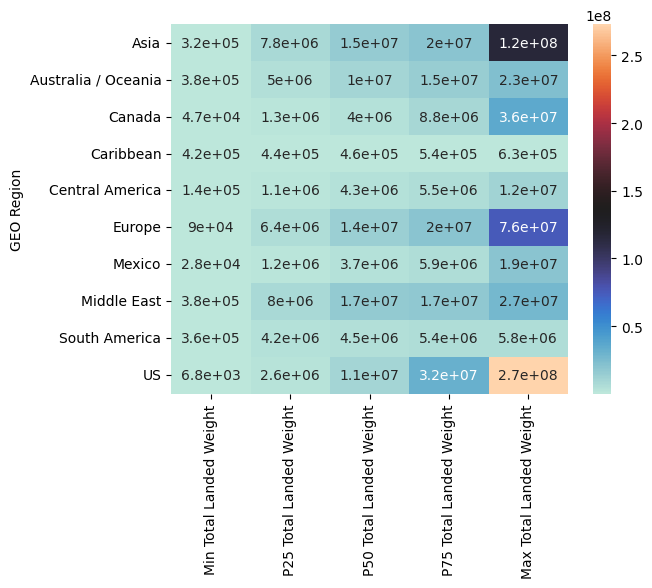

In [17]:
##Presentar mapa de calor
sns.heatmap(all_stats,cmap='icefire',annot=True)

In [18]:
all_stats.corr()

,Min Total Landed Weight,P25 Total Landed Weight,P50 Total Landed Weight,P75 Total Landed Weight,Max Total Landed Weight
Min Total Landed Weight,1.000000,0.394924,0.116413,-0.290180,-0.446842
P25 Total Landed Weight,0.394924,1.000000,0.917158,0.520076,0.136659
P50 Total Landed Weight,0.116413,0.917158,1.000000,0.768892,0.415257
P75 Total Landed Weight,-0.290180,0.520076,0.768892,1.000000,0.879472
Max Total Landed Weight,-0.446842,0.136659,0.415257,0.879472,1.000000


In [19]:
##Obtener el dataframe con el peso total desembarcado promedio
#region_avg_weight.set_index('GEO Region',inplace=True)
Stats_Total_Landed_Weight=pd.sqldf(' SELECT   mn."GEO Region",av."Average Total Landed Weight", mn."Min Total Landed Weight", p25."P25 Total Landed Weight", p50."P50 Total Landed Weight", p75."P75 Total Landed Weight", mx."Max Total Landed Weight"  FROM   region_min_weight mn  INNER JOIN   region_p25_weight p25 ON mn."GEO Region"=p25."GEO Region"      INNER JOIN region_p50_weight p50 ON mn."GEO Region"=p50."GEO Region"  INNER JOIN  region_p75_weight p75 ON mn."GEO Region"=p75."GEO Region" INNER JOIN  region_max_weight mx ON mn."GEO Region"=mx."GEO Region" INNER JOIN  region_avg_weight av ON mn."GEO Region"=av."GEO Region"',globals())
Stats_Total_Landed_Weight.to_csv('Stats_Total_Landed_Weight.csv')
Stats_Total_Landed_Weight

,GEO Region,Average Total Landed Weight,Min Total Landed Weight,P25 Total Landed Weight,P50 Total Landed Weight,P75 Total Landed Weight,Max Total Landed Weight
0,Asia,1.774287e+07,319999,7756000.0,14996000.0,19530000.0,117180000
1,Australia / Oceania,1.026978e+07,380000,5040000.0,10340000.0,14579000.0,23310000
2,Canada,5.607879e+06,47000,1336375.0,4023000.0,8828500.0,36157976
3,Caribbean,5.029593e+05,418878,439439.0,460000.0,545000.0,630000
4,Central America,3.848933e+06,137500,1100000.0,4266000.0,5545800.0,11704000
5,Europe,1.519388e+07,90389,6400000.0,13803000.0,19530000.0,75600000
6,Mexico,4.199444e+06,28000,1152000.0,3657500.0,5853267.0,19363600
7,Middle East,1.331029e+07,380000,7980000.0,16619970.0,17173969.0,26927251
8,South America,4.445480e+06,363000,4160000.0,4480000.0,5440000.0,5760000
9,US,2.606173e+07,6850,2557800.0,10531800.0,31927425.0,273042000


In [20]:
#Obtener la latitud y longitud de las regiones para presentar los datos en un mapa
from geopy.geocoders import Nominatim
region_longitude_latitude=pandas.DataFrame()
geolocator = Nominatim(user_agent="app")
for region in region_avg_weight.index:
    location = geolocator.geocode(region)
    temp_row=pandas.DataFrame({'GEO Region':region,'Longitude':location.longitude,'Latitude':location.latitude},index=[len(region_longitude_latitude)])
    region_longitude_latitude=pandas.concat([region_longitude_latitude,temp_row])
region_longitude_latitude.to_csv('region_longitude_latitude.csv')
region_longitude_latitude

,GEO Region,Longitude,Latitude
0,Asia,89.234375,51.208697
1,Australia / Oceania,150.898067,-34.416174
2,Canada,-107.991707,61.066692
3,Caribbean,-75.000000,18.400000
4,Central America,153.125616,-30.292848
5,Europe,10.000000,51.000000
6,Mexico,-99.133178,19.432630
7,Middle East,-76.588848,39.301416
8,South America,-61.000656,-21.000218
9,US,-100.445882,39.783730
